### Question 1 (M) : Propose a supervised learning setting :
- input space $X$
- output space $Y$
- a random variable $(X, Y)$ with a joint distribution.
- a loss function $l(x, y)$



$l = \begin{cases} 
X × Y → \mathbb{R_{+}} \\
(x, y) → l(x, y)
\end{cases}$

Compute the Bayes predictor $f^* : X → Y$ and the Bayes risk associated with this
setting. Remark : you have to use a setting different than the settings seen during
the course, in terms of input space $X$ and output space $Y$. However, you can use any
classical loss function $l$ (square loss, "0-1" loss, etc).

#### Nous allons étudier le risque de panne d'un serveur en fonction de la journée, nous supposons que ce dernier à plus de chance d'être défaillant aux heures de pointes donc entre 10h et 18h.


### Espaces des entrées et sorties
- **Espace des entrées $X$** : le temps en heures, une variable continue $X \in [0, 24[$.
- **Espace des sorties $Y$** : état du système, où $Y$ peut prendre deux valeurs: 0 (fonctionnel) ou 1 (non-fonctionnel).
### Distribution conditionnelle de $Y$ donné $X$
- $p(Y = 1 \mid X = x) = 0.8$ pour $10 \leq x < 18$ (heures de pointe, haute probabilité de défaillance).
- $p(Y = 1 \mid X = x) = 0.2$ pour toutes les autres heures (faible probabilité de défaillance).

Le prédicteur de Bayes, $f^*(X)$, est défini par la règle de décision qui prédit la classe ayant la probabilité conditionnelle la plus élevée étant donné $X$ :

$$f^*(x) = \begin{cases} 
1 & \text{si } p(Y = 1 \mid X = x) > 0.5 \\
0 & \text{sinon}
\end{cases}$$

Ce qui implique :

$$f^*(x) = \begin{cases} 
1 & \text{si } 10 \leq x < 18 \\
0 & \text{sinon}
\end{cases}$$

### Fonction de perte "0-1"
$$
l(y, \hat{y}) = \begin{cases} 
0 & \text{si } y = \hat{y} \\
1 & \text{si } y \neq \hat{y}
\end{cases}
$$

### Risque de Bayes
Le risque de Bayes, $R(f^*)$, est calculé comme l'espérance de la fonction de perte sous le prédicteur de Bayes :
$$
R(f^*) = E[l(Y, f^*(X))] = \sum_{x \in [0, 24[} p(X = x) \left[ p(Y = 1 \mid X = x) \cdot l(1, f^*(x)) + p(Y = 0 \mid X = x) \cdot l(0, f^*(x)) \right]
$$
Ce calcul nécessite de décomposer les heures du jour pour prendre en compte les différentes probabilités conditionnelles de défaillance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

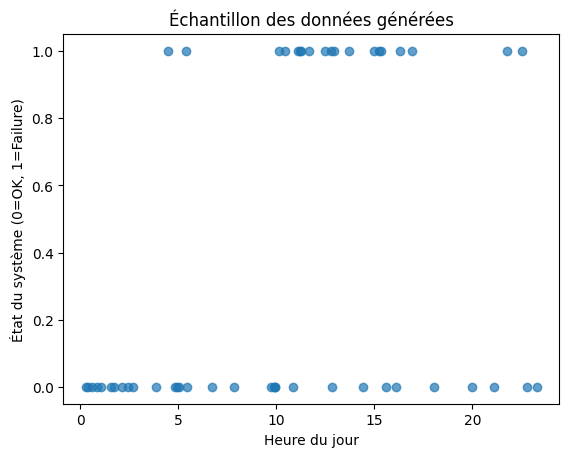

In [5]:
# 1. Configuration de l'environnement d'apprentissage supervisé
# Espace des entrées X : Temps en heures (une valeur réelle entre 0 et 24)
# Espace des sorties Y : Statut d'un système (0 pour fonctionnel, 1 pour non-fonctionnel)

n_samples = 100000

# Fonction pour générer des données
def generate_data(n_samples):
    X = np.random.uniform(0, 24, n_samples)  # heures de la journée
    p_failure = np.where((10 <= X) & (X < 18), 0.8, 0.2)  # probabilité de défaillance
    Y = np.random.binomial(1, p_failure)  # état du système en fonction de l'heure
    return X, Y

# Générer les données
X, Y = generate_data(n_samples)

# Afficher un échantillon des données
plt.scatter(X[:50], Y[:50], alpha=0.7)
plt.xlabel('Heure du jour')
plt.ylabel('État du système (0=OK, 1=Failure)')
plt.title('Échantillon des données générées')
plt.show()

### Question 2 (C) : 
Propose an estimator $\widetilde{f} : X → Y$ different than the Bayes estimator and run a simulation that gives a statistical approximation of its generalization error (risque réel) by computing its empirical risk on a test set. Perform the same simulation also for $f^*$, and verify that the generalization error is smaller for $f^∗$ than for $\widetilde{f}$, and that your computation in question 1 was correct (the test error for $f^∗$ should be close to the Bayes risk if there is a sufficiently large number of samples).

In [8]:
# 2. Définition et évaluation du prédicteur de Bayes
# Prédicteur de Bayes f*
def bayes_predictor(X):
    return np.where((10 <= X) & (X < 18), 1, 0)

# Prédicteur alternatif pour comparaison
def naive_predictor(X):
    return np.zeros_like(X)  # prédit toujours que le système est fonctionnel

# Prédiction sur les données
Y_pred_bayes = bayes_predictor(X)
Y_pred_naive = naive_predictor(X)

# Fonction de perte "0-1"
def zero_one_loss(Y, Y_pred):
    return np.mean(Y != Y_pred)

# Calculer le risque empirique pour chaque prédicteur
risk_bayes = zero_one_loss(Y, Y_pred_bayes)
risk_naive = zero_one_loss(Y, Y_pred_naive)

print(f"Risque empirique pour le prédicteur de Bayes: {risk_bayes}")
print(f"Risque empirique pour le prédicteur naïf: {risk_naive}")

# Comparaison de l'erreur de généralisation
print(f"Différence de risque entre le prédicteur naïf et le prédicteur de Bayes: {risk_naive - risk_bayes}")

# Conclusion
print("Le prédicteur de Bayes est meilleur en termes d'erreur de généralisation par rapport au prédicteur naïf.")

Risque empirique pour le prédicteur de Bayes: 0.20019
Risque empirique pour le prédicteur naïf: 0.39997
Différence de risque entre le prédicteur naïf et le prédicteur de Bayes: 0.19977999999999999
Le prédicteur de Bayes est meilleur en termes d'erreur de généralisation par rapport au prédicteur naïf.
